In [556]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

# random.seed('spearhead')

# Surpress SettingsWithCopyWarning Error
pd.options.mode.copy_on_write = True

In [557]:
data_table = pd.read_csv('Modified_Irrigation.csv')
# ship_table.head(2)

In [558]:
data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   crop      200 non-null    object
 1   moisture  200 non-null    int64 
 2   temp      200 non-null    int64 
 3   pump      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [559]:
# Better Approach
# ship_table.dropna(inplace=True)
# ship_table.reset_index(drop=True, inplace=True)
adjusted_dataset = data_table.dropna()
adjusted_dataset = adjusted_dataset.reset_index(drop=True)

# adjusted_ship_dataset.info()
# adjusted_ship_dataset.columns
# adjusted_ship_dataset.corr(method='pearson', numeric_only=True)

In [560]:
feature1 = 'moisture'
feature2 = 'temp'

k_mean_df = adjusted_dataset[[feature1, feature2]] 
# k_mean_df['n_centroid'] = np.nan

k_mean_df.tail()

,moisture,temp
195,941,13
196,902,45
197,894,42
198,1022,45
199,979,10


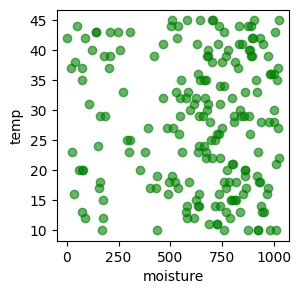

In [561]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(k_mean_df[feature1], k_mean_df[feature2], color='green', alpha=0.6)
ax.set_ylabel(feature2)
ax.set_xlabel(feature1)
plt.show()

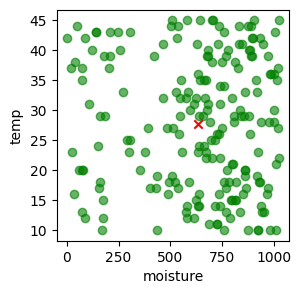

In [562]:
centroid = [k_mean_df[feature1].mean(), k_mean_df[feature2].mean()]
# print(centroid1)
# k = 1
fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(k_mean_df[feature1], k_mean_df[feature2], color='green', alpha=0.6)
ax.scatter(centroid[0], centroid[1], color='red', marker='x') 
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
plt.show()

In [563]:
def randompoint(feature):
  min = k_mean_df[feature].min()
  max = k_mean_df[feature].max()
  # print(min, max)
  return random.randint(min.astype(np.int64), max.astype(np.int64))

number_centroids = 2
centroids = np.array([[randompoint(feature1), randompoint(feature2)] for _ in range(number_centroids)])

print(centroids)

[[832  36]
 [ 45  22]]


In [564]:
distances_centroids = np.array([[math.dist([k_mean_df.iloc[x][feature1], k_mean_df.iloc[x][feature2]], [centroid[0], centroid[1]]) for centroid in centroids] for x in range(k_mean_df.shape[0])])
print(distances_centroids)

[[195.02820309 593.03035335]
 [310.52214092 477.01677119]
 [ 92.07062507 696.        ]
 [ 34.23448554 753.06639813]
 [142.22517358 645.02790637]
 [274.3082208  513.00097466]
 [255.13133873 533.09380038]
 [159.00314462 628.13453973]
 [190.21303846 597.4428843 ]
 [111.83022847 678.08922717]
 [161.52399203 626.00079872]
 [ 74.02702209 713.10097462]
 [325.1245915  462.57215653]
 [246.018292   541.11181839]
 [129.31357237 658.40185297]
 [116.52038448 671.00670637]
 [110.85576214 679.08909577]
 [  6.40312424 783.2304897 ]
 [199.42417105 588.00085034]
 [ 52.20153254 738.01084003]
 [197.         590.16607832]
 [307.01465763 480.12602512]
 [196.36700334 591.00338409]
 [ 28.31960452 768.03190038]
 [ 96.33275663 691.35012837]
 [ 23.02172887 788.05139426]
 [ 25.         763.03210942]
 [120.0333287  669.04783088]
 [ 27.20294102 761.02365272]
 [151.08275878 636.06367606]
 [171.00292395 616.13716005]
 [286.02797066 501.09979046]
 [ 77.49193506 714.10083322]
 [ 32.64965543 758.00065963]
 [162.60381299

In [565]:
index_centroids = np.array([[x.argmin(), x[x.argmin()]] for x in distances_centroids])
# print(index_centroids)
k_mean_df['nearest_centroids'] = index_centroids[:, 0]
# k_mean_df['nearest_centroids_distance']
wcss = index_centroids[:, 1].sum()

# print(k_mean_df['nearest_centroids_distance'])
# wcss = k_mean_df.groupby(by=['nearest_centroids'])[['nearest_centroids_distance']].sum().sum()
# wcss = wcss['nearest_centroids_distance'].sum()
print(wcss)

28491.016516569995


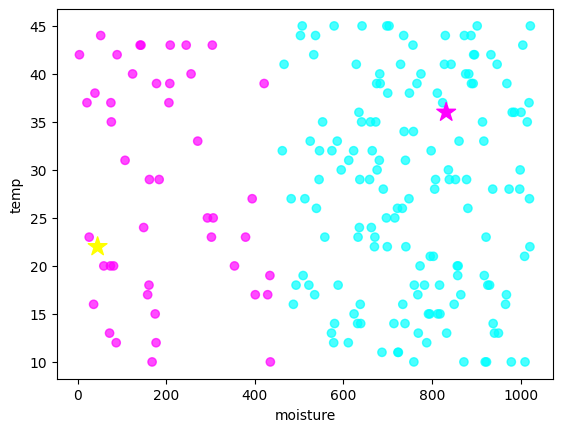

In [566]:
# print(centroids)

# BETTER SOLUTION
# fig, ax = plt.subplots(figsize=(8, 8))
fig, ax = plt.subplots()

# Datasets
ax.scatter(k_mean_df[feature1], k_mean_df[feature2], c=k_mean_df['nearest_centroids'], cmap='cool', alpha=0.7)

# Centroids
centroid_x = centroids[:, 0]
centroid_y = centroids[:, 1]
colors = ['black', 'green', 'blue']
plt.scatter(centroid_x, centroid_y, c=range(len(centroids)), cmap='spring', marker='*', s=200)

# plt.colorbar(ax)

ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
plt.show()

In [567]:
# NEW Centroids
new_centroids = k_mean_df.groupby(by=['nearest_centroids']).mean()
centroids = np.array([[new_centroids.iloc[i][feature1], new_centroids.iloc[i][feature2]] for i in range(len(new_centroids))])
print(new_centroids)
print(centroids)
terminate = centroids.sum()

                     moisture       temp
nearest_centroids                       
0.0                760.980645  27.600000
1.0                192.555556  28.266667
[[760.98064516  27.6       ]
 [192.55555556  28.26666667]]


1
28491.016516569995
138421.71900880063


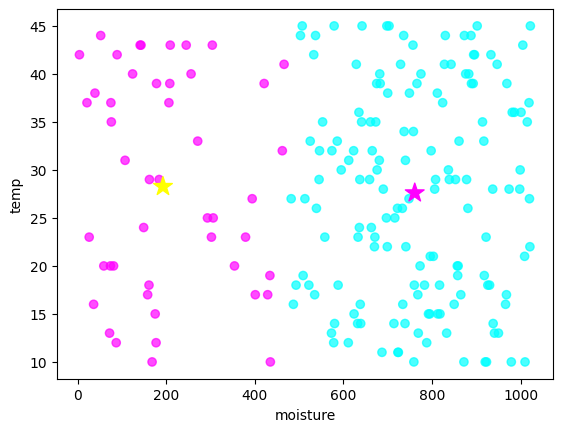

2
24663.691950893393
136924.43080408574


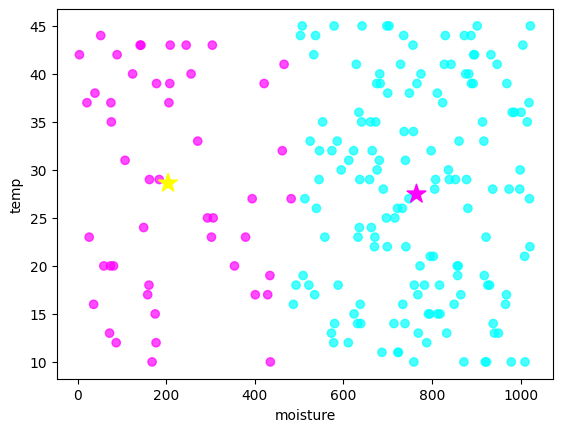

3
24745.798388333154
136185.66822970292


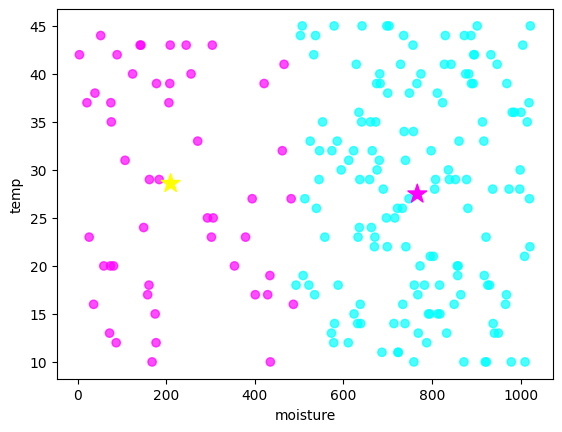

4
24794.9620876968
135477.15579937637


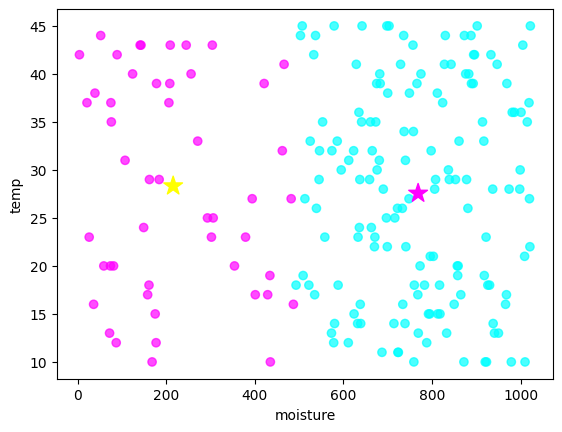

5
24849.495549185027
135477.15579937637


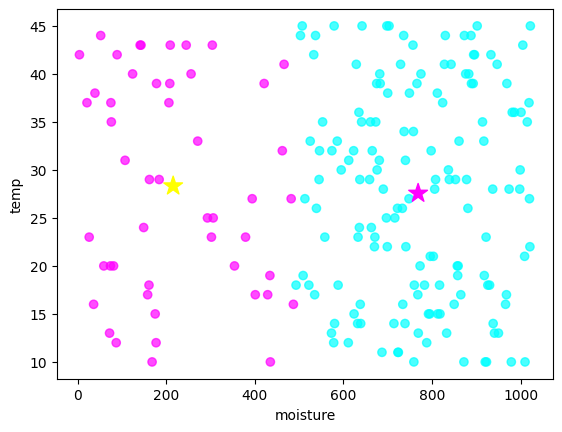

24849.495549185027


In [568]:
# termination criterion

itr = 1
while (True):
  print(itr)

  # Computer Distance for each centroid
  distances_centroids = np.array([[math.dist([k_mean_df.iloc[x][feature1], k_mean_df.iloc[x][feature2]], [centroid[0], centroid[1]]) for centroid in centroids] for x in range(k_mean_df.shape[0])])
  
  # OLD
  # index_centroids = np.array([x.argmin() for x in distances_centroids])
  # k_mean_df['nearest_centroids'] = index_centroids 

  # NEW for WCSS
  index_centroids = np.array([[x.argmin(), x[x.argmin()]] for x in distances_centroids])
  k_mean_df['nearest_centroids'] = index_centroids[:, 0]

  # k_mean_df['nearest_centroids_distance'] = index_centroids[:, 1]
  # wcss = k_mean_df.groupby(by=['nearest_centroids'])[['nearest_centroids_distance']].sum().sum()

  print(wcss)
  print(distances_centroids.sum()) # termination criterion

  # fig, ax = plt.subplots(figsize=(2,2))
  fig, ax = plt.subplots()
  # Datasets
  ax.scatter(k_mean_df[feature1], k_mean_df[feature2], c=k_mean_df['nearest_centroids'], cmap='cool', alpha=0.7)
  # Centroids
  centroid_x = centroids[:, 0]
  centroid_y = centroids[:, 1]
  plt.scatter(centroid_x, centroid_y, c=range(len(centroids)), cmap='spring', marker='*', s=200)
  # labels
  ax.set_xlabel(feature1)
  ax.set_ylabel(feature2)
  plt.show()

  # NEW Centroids 
  new_centroids = k_mean_df.groupby(by=['nearest_centroids']).mean()
  # print(new_centroids)
  centroids = np.array([[new_centroids.iloc[i][feature1], new_centroids.iloc[i][feature2]] for i in range(len(new_centroids))])
  # print(centroids)

  itr+=1
  # old termination criterion
  # if (math.floor(terminate) == math.floor(centroids.sum())):
  #   print(distances_centroids.sum())
  #   break
  # terminate = centroids.sum()
  
  # wcss termination criterion  
  if (wcss == index_centroids[:, 1].sum()):
    print(index_centroids[:, 1].sum())
    break
  wcss = index_centroids[:, 1].sum()

In [569]:
print(k_mean_df.groupby(by=['nearest_centroids']).count())
print(adjusted_dataset.groupby(by=['pump']).count())

                   moisture  temp
nearest_centroids                
0.0                     151   151
1.0                      49    49
      crop  moisture  temp
pump                      
0       50        50    50
1      150       150   150
